<a href="https://colab.research.google.com/github/LatiefDataVisionary/data-management-and-data-infrastructure-college-task/blob/main/Bank_Marketing_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pengolahan Dataset dan Cerita Hasil Pengolahan Dataset Menggunakan Python (.ipynb) di Google Colab (Soal No. 4 & 5)**

**Judul Dataset** 		: Bank Marketing Campaign

**Link Dataset** 		: https://www.kaggle.com/code/janiobachmann/bank-marketing-campaign-opening-a-term-deposit


## **Import Library**


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

##**Load Dataset**

Mount Google Drive


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


Navigasi File


In [4]:
file_path ='/content/drive/My Drive/Management and Infrastruktur Data/bank.csv'
data = pd.read_csv(file_path)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## **1. Pra-Pengolahan Data**


### **Mencari Informasi Dataset**

Secara sederhana, `data.info()` memberikan kita gambaran umum tentang dataset yang sedang kita gunakan. Ibaratnya seperti membaca *summary* atau ringkasan dari sebuah buku sebelum kita membacanya secara keseluruhan.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Nah, dari output `data.info()` diatas, kita bisa mendapatkan informasi penting berikut:

1. **Jumlah Baris dan Kolom**: Dataset ini memiliki **11.162 baris data**, yang artinya ada 11.162 observasi atau individu yang tercatat. Selain itu, dataset ini memiliki **17 kolom**, yang berarti ada 17 variabel atau atribut yang mendeskripsikan setiap observasi.

2. **Nama dan Tipe Data Kolom**: Tabel di output `data.info()` menunjukkan nama setiap kolom beserta tipe datanya.  

  * Ada **7 kolom** dengan tipe data `int64`, yang berarti kolom-kolom ini berisi bilangan bulat (integer). Contohnya: `age`, `balance`, `day`, `duration`, `campaign`, `pdays`, dan `previous`.
  * Ada **10 kolom** dengan tipe data `object`, yang biasanya menunjukkan data kategorikal atau teks. Contohnya: `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `poutcome`, dan `deposit`.
3. **Jumlah Data yang Tidak Kosong (Non-Null)**: Pada bagian Non-Null Count, kita bisa melihat jumlah data yang tidak kosong (tidak hilang/ *missing*) pada setiap kolom. Untungnya, semua kolom pada dataset ini memiliki 11.162 data non-null, yang berarti tidak ada *missing values* yang perlu kita khawatirkan.

4. **Penggunaan Memori**: Di bagian bawah output, tertulis `memory usage: 1.4+ MB`. Ini menunjukkan seberapa besar memori yang digunakan oleh dataset ini di Colab. Informasi ini berguna untuk memperkirakan kebutuhan memori saat kita memproses dataset yang lebih besar.

### **Mengecek nilai yang hilang (*missing value*)**

Secara sederhana, kode `data.isnull().sum()` digunakan untuk **mengecek apakah ada data yang hilang (missing values)** dalam dataset kita.

Cara kerjanya begini:

1. `data.isnull()`: Bagian ini akan memeriksa setiap sel di dalam dataset. Jika sel tersebut kosong atau tidak berisi data, maka akan diberi tanda `True`, dan jika berisi data, akan diberi tanda `False`.
2. `.sum()`: Kemudian, fungsi `sum()` akan menjumlahkan semua tanda `True` (yang menandakan *missing values*) pada setiap kolom.

In [6]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


Kita bisa melihat bahwa **semua kolom memiliki nilai 0**. Artinya, **tidak ada data yang hilang (missing values)** di dalam dataset kamu. Semua kolom terisi penuh dengan data.

Ini adalah kabar baik! Karena kita tidak perlu melakukan penanganan khusus untuk *missing values*, seperti *imputation* atau menghapus baris/kolom yang memiliki data kosong. Kita bisa langsung melanjutkan ke tahap analisis data selanjutnya.

### **Transformasi Data**

Beberapa algoritma machine learning bekerja lebih baik jika data memiliki distribusi normal. Kita bisa mempertimbangkan transformasi data seperti logaritmik atau Box-Cox.

In [9]:
data['balance_log'] = np.log1p(data['balance'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


**Alasan**: Transformasi data dapat membantu meningkatkan linearitas dan normalitas data, yang dapat meningkatkan performa beberapa model.

## **2. Eksplorasi Data (EDA)**

### **Statistik deskriptif**

Secara sederhana, fungsi `data.describe()` memberikan **statistik deskriptif** dari data numerik dalam dataset. Statistik ini membantu kita memahami karakteristik dasar data, seperti:

* **count**: Jumlah data non-null pada setiap kolom.
* **mean**: Rata-rata nilai pada setiap kolom.
* **std**: Standar deviasi, menunjukkan sebaran data di sekitar rata-rata.
* **min**: Nilai minimum pada setiap kolom.
* **25%**: Kuartil pertama (Q1), nilai di mana 25% data berada di bawahnya.
* **50%**: Kuartil kedua (Q2) atau median, nilai di mana 50% data berada di bawahnya.
* **75%**: Kuartil ketiga (Q3), nilai di mana 75% data berada di bawahnya.
* **max**: Nilai maksimum pada setiap kolom.

Dengan menjalankan `data.describe()` pada dataset ini, akan muncul tabel yang menampilkan statistik-statistik tersebut untuk setiap kolom numerik.

Statistik deskriptif ini sangat berguna dalam EDA karena:

* **Identifikasi Outlier**: Dengan melihat nilai `min`, `max`, dan `kuartil`, kita bisa mengidentifikasi potensi outlier atau nilai ekstrem yang mungkin perlu ditangani lebih lanjut.
* **Memahami Distribusi Data**: Statistik seperti `mean`, `std`, dan kuartil memberikan gambaran tentang distribusi data, apakah terdistribusi normal, miring, atau memiliki pola tertentu.
* **Perbandingan Antar Kolom**: Dengan membandingkan statistik deskriptif antar kolom, kita bisa melihat perbedaan karakteristik data pada setiap variabel.

Jadi, dengan menjalankan `data.describe()` dan memahami outputnya, kita akan mendapatkan pemahaman awal yang penting tentang data numerik dalam dataset ini sebelum melakukan analisis lebih lanjut.

In [10]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous,balance_log
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,1.048300e+04
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,-inf
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,NaN
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,-inf
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,5.214936e+00
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,6.437752e+00
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,7.517793e+00
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.130473e+01


### **Bar Plot untuk Distribusi Data Kategorikal**

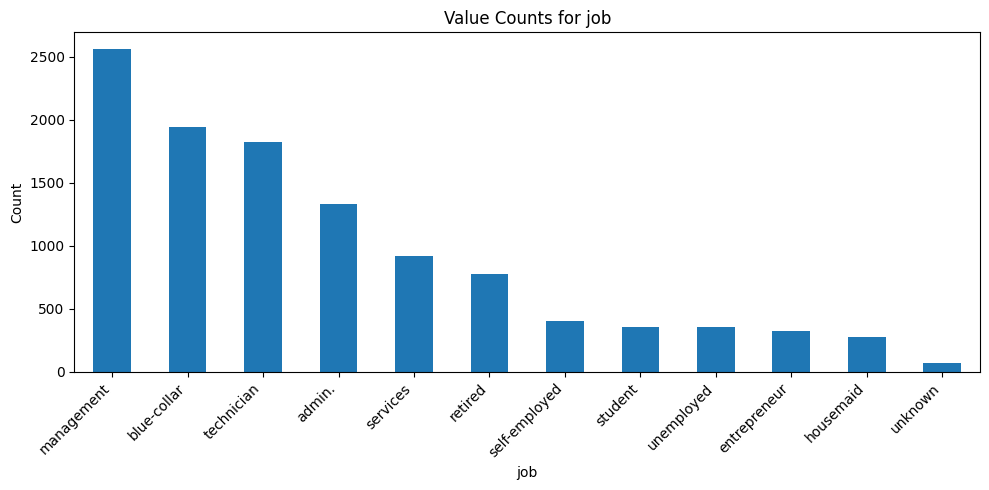

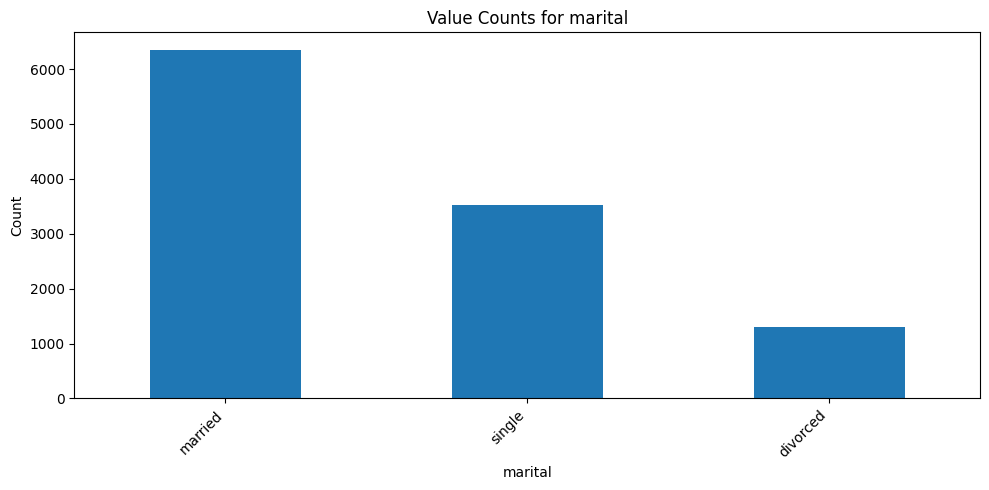

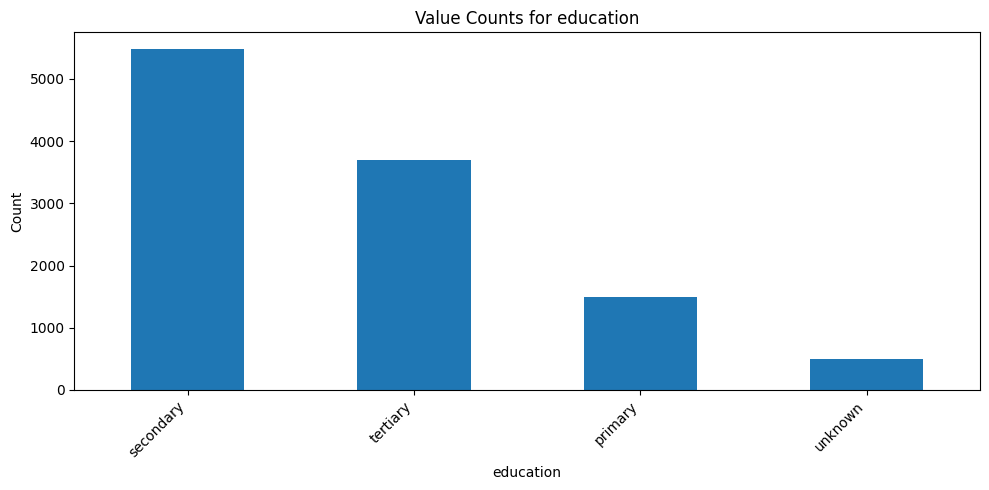

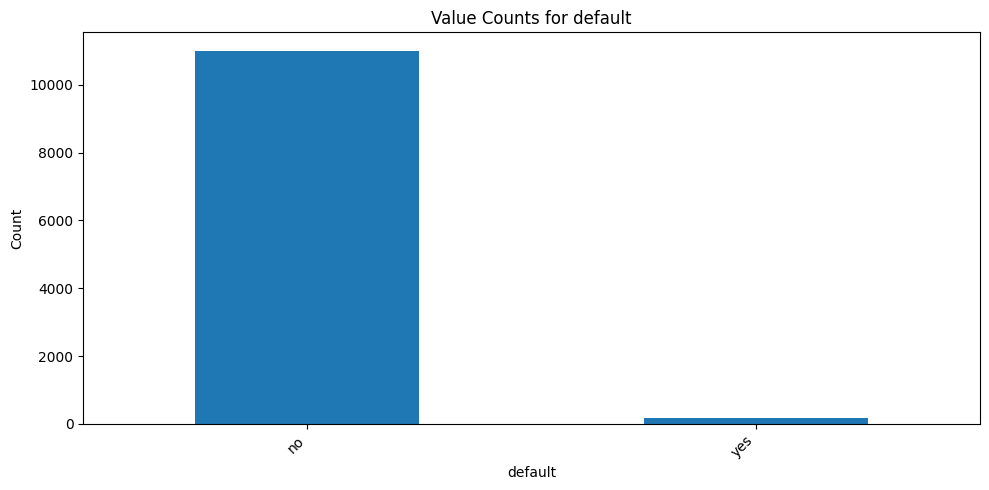

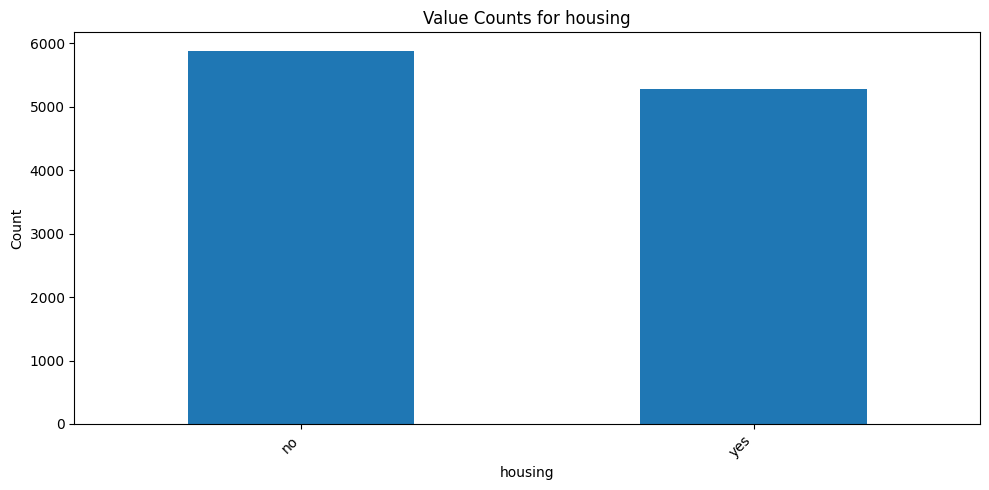

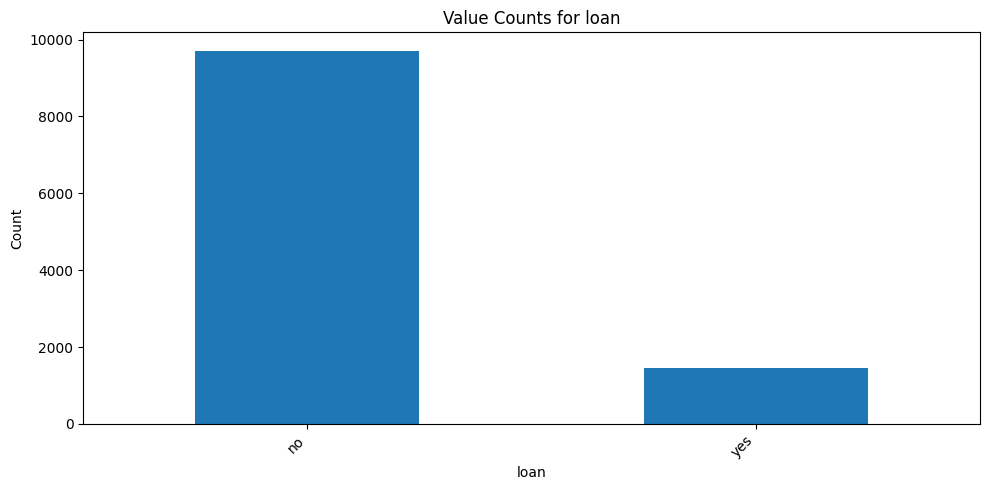

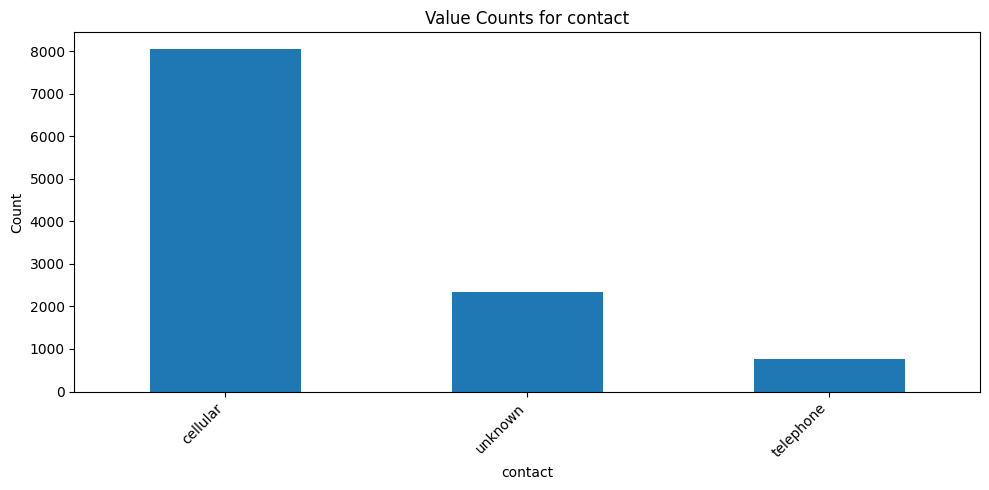

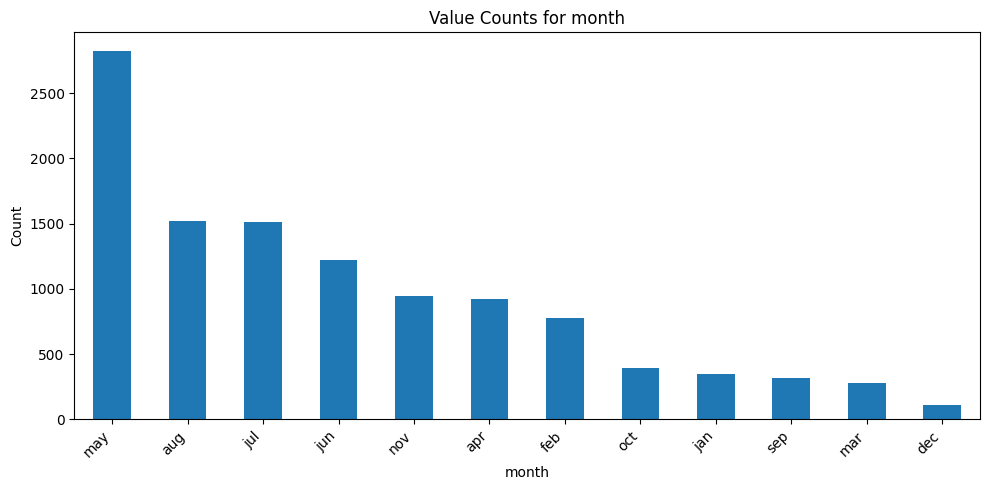

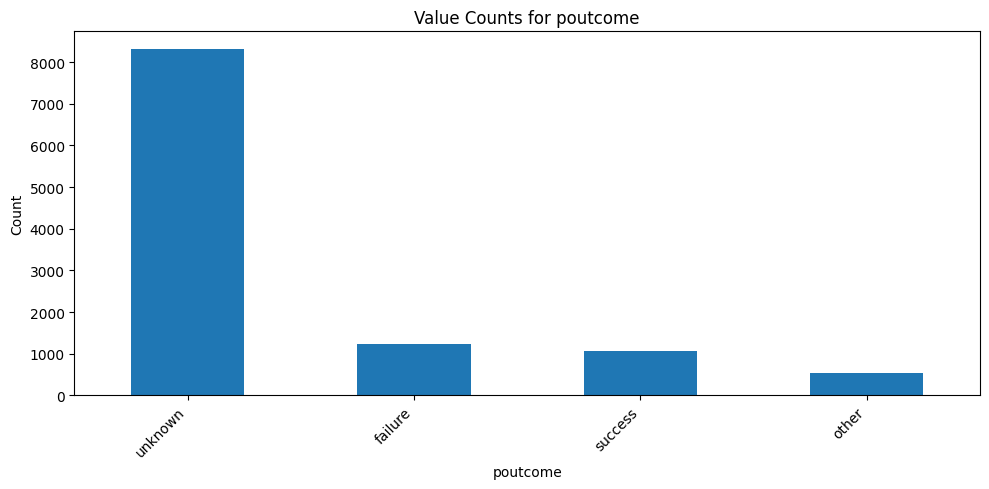

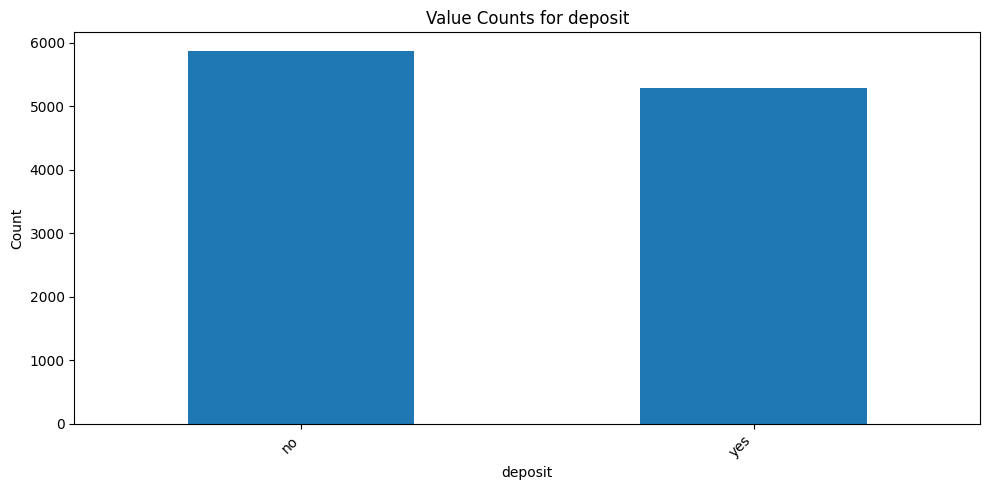

In [16]:
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
for col in categorical_cols:
  plt.figure(figsize=(10,5))  # Mengatur ukuran figure
  data[col].value_counts().plot(kind='bar') # Membuat bar plot
  plt.title(f'Value Counts for {col}') # Memberi judul plot
  plt.xlabel(col) # Memberi label sumbu x
  plt.ylabel('Count') # Memberi label sumbu y
  plt.xticks(rotation=45, ha='right') # Merotasi label sumbu x agar mudah dibaca
  plt.tight_layout() # Mengatur layout agar tidak tumpang tindih
  plt.show() # Menampilkan plot

**1. Kolom `Job`**:


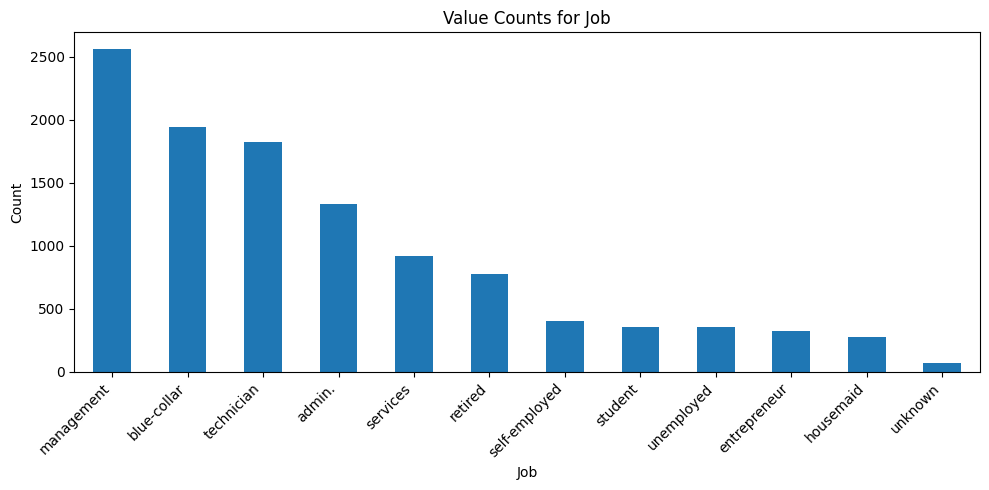

In [17]:
# Kolom 'job'
plt.figure(figsize=(10, 5))
data['job'].value_counts().plot(kind='bar')
plt.title('Value Counts for Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Nasabah dengan pekerjaan "`management`" cenderung lebih banyak membuka deposito. Ini bisa mengindikasikan bahwa kelompok ini memiliki daya beli yang lebih tinggi atau lebih sadar akan pentingnya menabung.
* Nasabah dengan pekerjaan "`blue-collar`" dan "`technician`" juga cukup banyak yang membuka deposito. Ini menunjukkan bahwa produk deposito bank tersebut menarik minat dari berbagai kalangan, tidak hanya kalangan profesional.
* Nasabah dengan pekerjaan "`student`", "`unemployed`", dan "`housemaid`" cenderung lebih sedikit yang membuka deposito. Ini mungkin karena kelompok ini memiliki keterbatasan finansial atau prioritas keuangan yang berbeda.


**2. Kolom `Job`**:

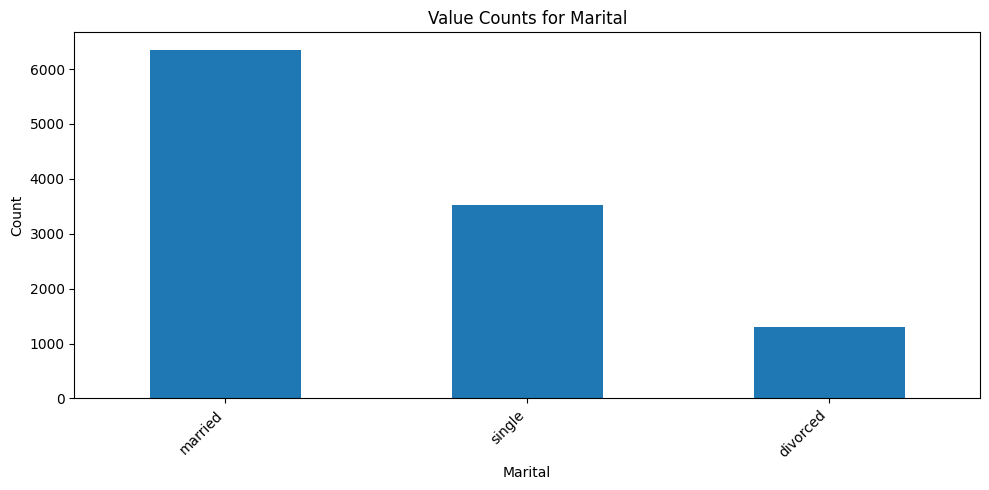

In [18]:
# Kolom 'marital'
plt.figure(figsize=(10, 5))
data['marital'].value_counts().plot(kind='bar')
plt.title('Value Counts for Marital')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


* **Sebagian besar nasabah yang melakukan deposito sudah menikah**. Ini menunjukkan bahwa orang yang sudah menikah cenderung lebih tertarik atau mampu untuk membuka deposito. Kemungkinan, mereka memiliki stabilitas finansial yang lebih baik atau memiliki tujuan finansial yang lebih besar, seperti menabung untuk masa depan keluarga.
* **Nasabah yang masih single juga cukup banyak yang melakukan deposito**. Ini menandakan bahwa kelompok ini juga memiliki kesadaran akan pentingnya menabung, meskipun mungkin tujuan menabung mereka berbeda dengan yang sudah menikah.
* **Nasabah yang bercerai merupakan kelompok terkecil yang melakukan deposito**. Hal ini bisa disebabkan oleh beberapa faktor, seperti:
  * **Kondisi finansial**: Nasabah yang baru bercerai mungkin sedang mengalami ketidakstabilan finansial dan belum siap untuk membuka deposito.
  * **Prioritas**: Mereka mungkin memiliki prioritas finansial yang berbeda, seperti melunasi utang atau membangun kembali kehidupan mereka.
  * **Persepsi**: Mereka mungkin memiliki persepsi yang berbeda tentang produk deposito atau merasa tidak yakin dengan masa depan finansial mereka.

**Apa artinya bagi bank?**

* **Fokus pada nasabah yang sudah menikah**: Bank bisa lebih fokus pada segmentasi pasar ini dengan menawarkan produk dan layanan yang relevan dengan kebutuhan keluarga, seperti deposito berjangka dengan bunga kompetitif atau produk investasi yang aman.
* **Jangan mengabaikan nasabah single**: Meskipun jumlahnya lebih sedikit, nasabah single juga memiliki potensi besar. Bank bisa menawarkan produk yang lebih fleksibel dan menarik bagi mereka, seperti deposito dengan jangka waktu pendek atau produk investasi yang mudah diakses.
* **Perhatikan nasabah yang bercerai**: Meskipun jumlahnya paling sedikit, ada potensi untuk meningkatkan jumlah nasabah dari kelompok ini. Bank bisa menawarkan program edukasi finansial atau produk yang dirancang khusus untuk membantu mereka membangun kembali stabilitas finansial.


**3. Kolom `education`**:

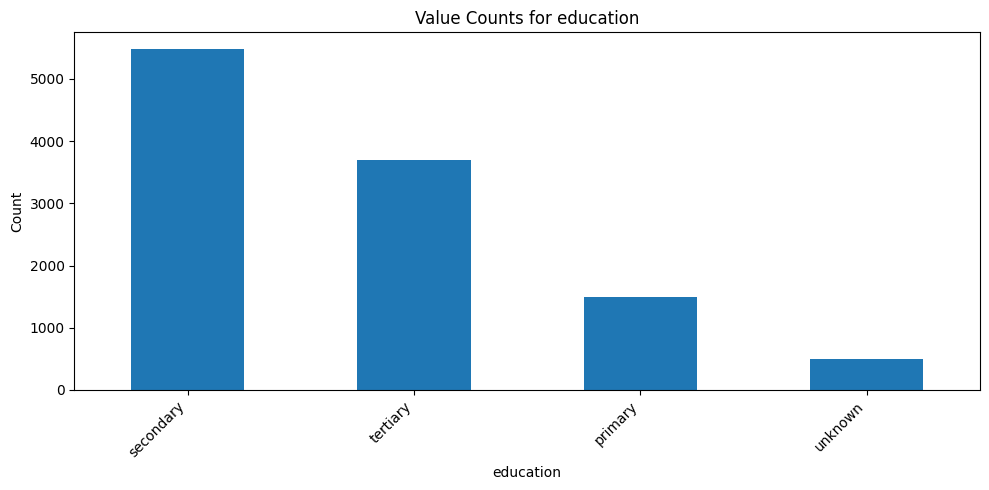

In [19]:
# Kolom 'education'
plt.figure(figsize=(10, 5))
data['education'].value_counts().plot(kind='bar')
plt.title('Value Counts for education')
plt.xlabel('education')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* **Sebagian besar nasabah yang melakukan deposito memiliki pendidikan terakhir tingkat menengah (`secondary`)**. Ini menunjukkan bahwa kelompok dengan pendidikan menengah memiliki minat yang lebih tinggi untuk menabung atau memiliki kemampuan finansial yang lebih baik.
* **Nasabah dengan pendidikan tinggi (`tertiary`) juga cukup banyak yang melakukan deposito**. Ini menunjukkan bahwa kelompok ini memiliki kesadaran akan pentingnya perencanaan keuangan jangka panjang.
* **Nasabah dengan pendidikan dasar (`primary`) dan yang tidak diketahui tingkat pendidikannya (`unknown`) merupakan kelompok yang lebih kecil yang melakukan deposito**. Ini bisa disebabkan oleh beberapa faktor, seperti:
  * **Kondisi finansial**: Nasabah dengan pendidikan dasar mungkin memiliki keterbatasan finansial atau lebih memprioritaskan kebutuhan sehari-hari.
  * **Akses informasi**: Nasabah dengan pendidikan yang lebih rendah mungkin memiliki akses informasi yang lebih terbatas tentang produk keuangan.

**Apa artinya bagi bank?**

* **Fokus pada nasabah dengan pendidikan menengah**: Bank bisa lebih fokus pada segmentasi pasar ini dengan menawarkan produk dan layanan yang sesuai dengan kebutuhan mereka, seperti produk investasi yang mudah dipahami atau layanan konsultasi keuangan.
* **Jangan mengabaikan nasabah dengan pendidikan tinggi**: Kelompok ini memiliki potensi untuk menjadi nasabah dengan nilai tambah yang tinggi. Bank bisa menawarkan produk yang lebih kompleks dan layanan yang lebih personal.
* **Perhatikan nasabah dengan pendidikan dasar dan yang tidak diketahui**: Bank bisa memberikan edukasi finansial yang lebih intensif kepada kelompok ini untuk meningkatkan kesadaran mereka tentang pentingnya menabung dan berinvestasi.



**4. Kolom `default`**:

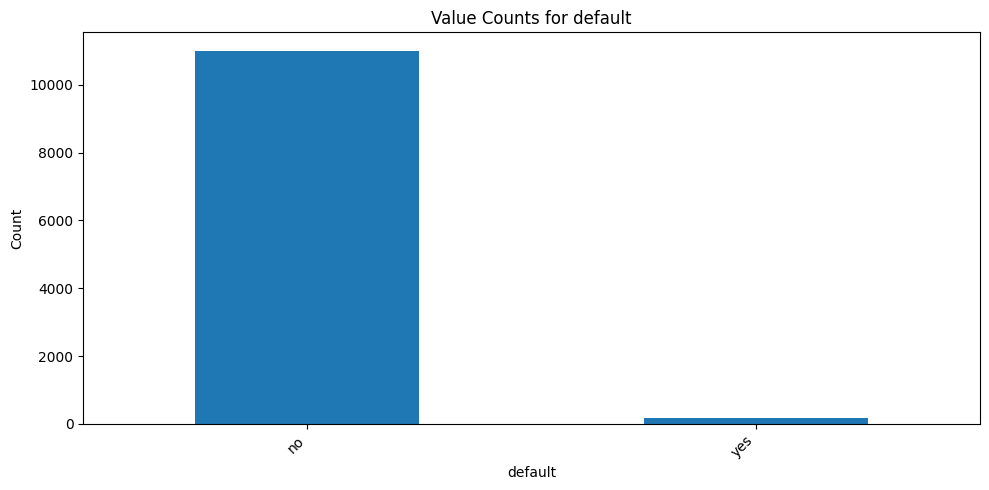

In [20]:
# Kolom 'default'
plt.figure(figsize=(10, 5))
data['default'].value_counts().plot(kind='bar')
plt.title('Value Counts for default')
plt.xlabel('default')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* **Sebagian besar nasabah tidak mengalami default**. Ini menunjukkan bahwa secara umum, nasabah yang ada dalam dataset ini memiliki rekam jejak pembayaran yang baik.
* **Hanya sebagian kecil nasabah yang mengalami default**. Ini berarti bahwa tingkat ketidakmampuan membayar atau gagal bayar di antara nasabah ini relatif rendah.

**Apa artinya bagi bank?**

* **Portofolio kredit yang sehat**: Jumlah nasabah yang mengalami default yang rendah menunjukkan bahwa bank memiliki portofolio kredit yang relatif sehat. Ini berarti bahwa bank memiliki risiko kredit yang lebih rendah.
* **Potensi untuk meningkatkan penyaluran kredit**: Dengan tingkat default yang rendah, bank dapat mempertimbangkan untuk meningkatkan penyaluran kredit kepada nasabah baru, terutama jika mereka memenuhi kriteria kredit yang baik.
* **Perlu adanya pemantauan terhadap nasabah yang berpotensi mengalami default**: Meskipun jumlahnya kecil, nasabah yang mengalami default tetap perlu diperhatikan. Bank perlu melakukan analisis lebih lanjut untuk mengidentifikasi faktor-faktor yang menyebabkan terjadinya default dan mengambil tindakan preventif untuk mencegah terjadinya default pada nasabah lainnya.

**5. Kolom `housing`**:

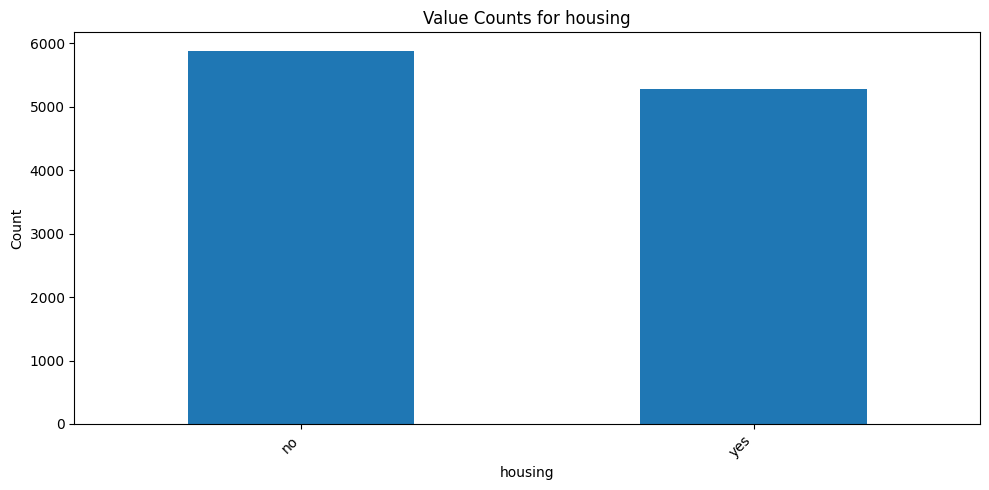

In [21]:
# Kolom 'housing'
plt.figure(figsize=(10, 5))
data['housing'].value_counts().plot(kind='bar')
plt.title('Value Counts for housing')
plt.xlabel('housing')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* **Sebagian besar nasabah tidak memiliki pinjaman perumahan**. Ini menunjukkan bahwa banyak nasabah yang belum memiliki kewajiban utang untuk perumahan.
* **Jumlah nasabah yang memiliki pinjaman perumahan juga cukup signifikan**. Ini menunjukkan bahwa ada cukup banyak nasabah yang memiliki beban utang untuk perumahan.

**Apa artinya bagi bank?**

* **Potensi pasar yang besar**: Nasabah yang tidak memiliki pinjaman perumahan bisa menjadi target potensial untuk produk kredit perumahan. Bank bisa menawarkan berbagai jenis produk kredit perumahan dengan suku bunga yang menarik dan persyaratan yang mudah.
* **Perlu hati-hati dalam memberikan kredit perumahan**: Nasabah yang sudah memiliki pinjaman perumahan perlu diperhatikan dengan baik. Bank perlu melakukan analisis yang cermat terhadap kemampuan pembayaran mereka sebelum memberikan kredit tambahan.
* **Peluang untuk bundling produk**: Bank bisa menawarkan produk bundling, misalnya gabungan antara deposito dan kredit perumahan, untuk memberikan nilai tambah kepada nasabah.

**6. Kolom `loan`**:

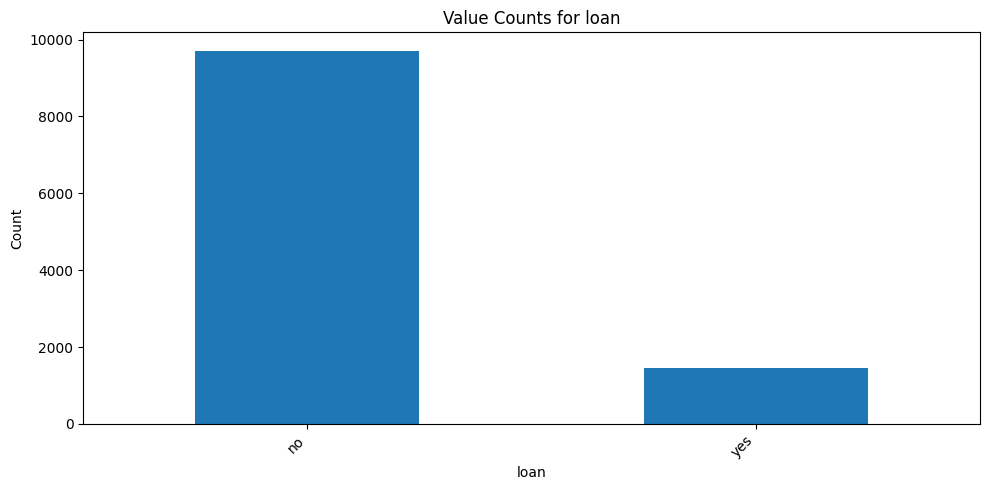

In [22]:
# Kolom 'loan'
plt.figure(figsize=(10, 5))
data['loan'].value_counts().plot(kind='bar')
plt.title('Value Counts for loan')
plt.xlabel('loan')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* **Sebagian besar nasabah tidak memiliki pinjaman pribadi**. Artinya, banyak nasabah yang tidak punya utang pribadi selain mungkin utang rumah.
* **Hanya sebagian kecil nasabah yang memiliki pinjaman pribadi**. Ini berarti tidak banyak nasabah yang punya utang pribadi tambahan.

**Apa artinya bagi bank?**

* **Peluang besar untuk tawarkan pinjaman**: Karena banyak nasabah yang tidak punya utang, bank bisa coba tawarkan produk pinjaman pribadi dengan suku bunga menarik dan syarat yang mudah.
* **Perlu hati-hati saat memberikan pinjaman**: Bagi nasabah yang sudah punya pinjaman, bank perlu teliti sebelum memberi pinjaman tambahan untuk memastikan mereka mampu membayar.
* **Peluang untuk gabungkan produk**: Bank bisa tawarkan paket produk, misalnya gabungkan deposito dengan pinjaman pribadi, untuk menarik minat nasabah.

**7. Kolom `contact`**:

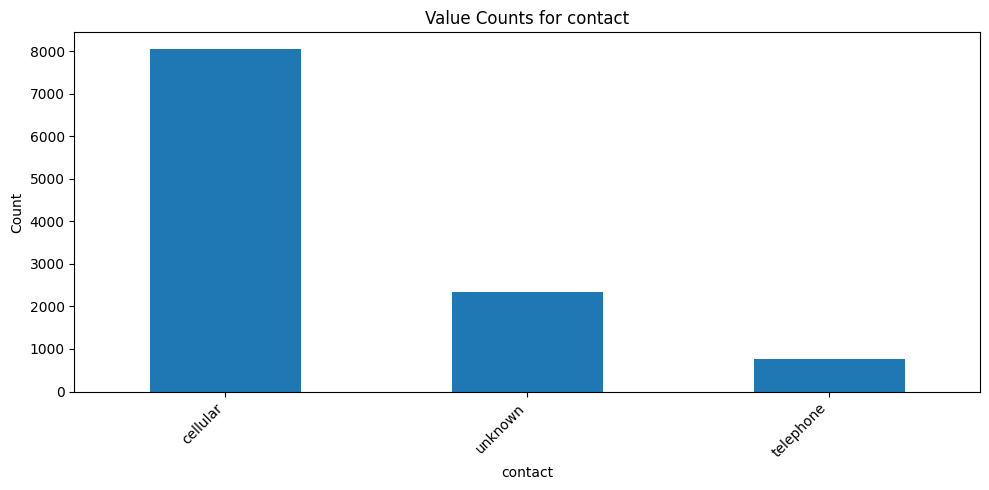

In [33]:
# Kolom 'contact'
plt.figure(figsize=(10, 5))
data['contact'].value_counts().plot(kind='bar')
plt.title('Value Counts for contact')
plt.xlabel('contact')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Grafik di atas menunjukkan bagaimana bank menghubungi nasabah untuk menawarkan produk deposito.

**Apa yang bisa kita lihat dari grafik ini?**

* **Sebagian besar nasabah dihubungi melalui telepon seluler (`cellular`)**. Ini menunjukkan bahwa bank lebih sering menggunakan telepon seluler sebagai sarana komunikasi untuk menjangkau nasabah.
* **Ada juga nasabah yang dihubungi melalui telepon rumah (`telephone`) dan ada juga yang cara kontaknya tidak diketahui (`unknown`)**. Ini menunjukkan bahwa bank menggunakan berbagai cara untuk menghubungi nasabah, namun telepon seluler adalah yang paling umum.

**Apa artinya bagi bank?**

* **Telepon seluler adalah saluran komunikasi yang paling efektif**. Karena sebagian besar nasabah dihubungi melalui telepon seluler, maka bank perlu memastikan bahwa kampanye pemasaran melalui telepon seluler berjalan efektif.
* **Perlu adanya diversifikasi saluran komunikasi**. Meskipun telepon seluler adalah saluran yang paling efektif, bank juga perlu mempertimbangkan saluran komunikasi lainnya seperti telepon rumah atau email untuk menjangkau segmen nasabah yang berbeda.
* **Pentingnya data yang akurat**. Untuk meningkatkan efektivitas kampanye pemasaran, bank perlu memastikan bahwa data kontak nasabah, terutama nomor telepon seluler, akurat dan up-to-date.

**8. Kolom `month`**:

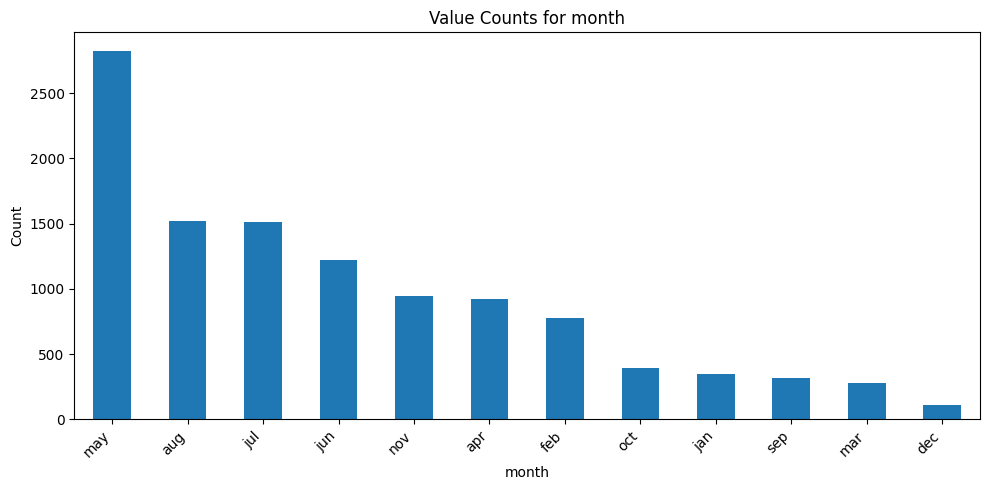

In [24]:
# Kolom 'month'
plt.figure(figsize=(10, 5))
data['month'].value_counts().plot(kind='bar')
plt.title('Value Counts for month')
plt.xlabel('month')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Grafik di atas menunjukkan seberapa sering kampanye pemasaran bank dilakukan setiap bulannya.

**Apa yang bisa kita lihat dari grafik ini?**

* **Bulan Mei adalah bulan dengan frekuensi kampanye pemasaran tertinggi**. Ini artinya, kampanye pemasaran paling sering dilakukan pada bulan Mei.
* **Bulan Desember adalah bulan dengan frekuensi kampanye pemasaran terendah**. Ini menunjukkan bahwa kampanye pemasaran jarang dilakukan pada bulan Desember.
* **Secara umum, frekuensi kampanye pemasaran cenderung lebih tinggi pada bulan-bulan tertentu**. Ini mungkin karena ada faktor-faktor tertentu yang mempengaruhi keputusan bank untuk melakukan kampanye pemasaran pada bulan-bulan tersebut, seperti musim, liburan, atau event khusus.

**Apa artinya bagi bank?**

* **Bulan Mei adalah waktu yang tepat untuk meningkatkan penjualan produk deposito**. Karena kampanye pemasaran paling sering dilakukan pada bulan Mei, maka ini adalah peluang yang baik bagi bank untuk meningkatkan penjualan produk deposito.
* **Perlu dievaluasi kembali frekuensi kampanye pada bulan Desember**. Karena kampanye pemasaran jarang dilakukan pada bulan Desember, maka bank perlu mengevaluasi kembali apakah ini adalah strategi yang tepat. Mungkin ada potensi yang terlewatkan untuk meningkatkan penjualan pada bulan Desember.
* **Perlu menganalisis faktor-faktor yang mempengaruhi frekuensi kampanye pemasaran**. Dengan memahami faktor-faktor yang mempengaruhi frekuensi kampanye pemasaran, bank dapat menyusun strategi pemasaran yang lebih efektif dan efisien.

**9. Kolom `poutcome`**:

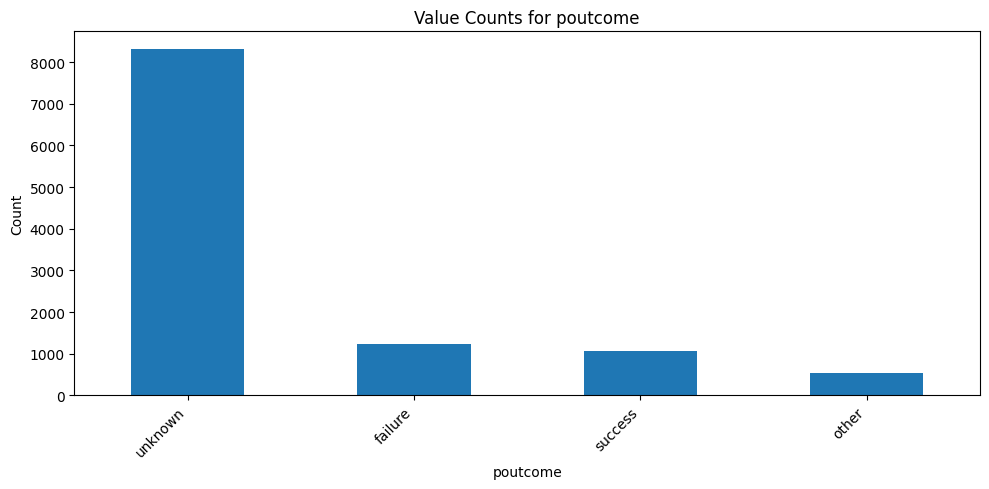

In [35]:
# Kolom 'poutcome'
plt.figure(figsize=(10, 5))
data['poutcome'].value_counts().plot(kind='bar')
plt.title('Value Counts for poutcome')
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Grafik di atas menunjukkan hasil dari kampanye pemasaran sebelumnya terhadap nasabah.

**Apa yang bisa kita lihat dari grafik ini?**

* **Sebagian besar hasil kampanye sebelumnya tidak diketahui (`unknown`)**. Ini berarti bank tidak memiliki data yang cukup mengenai hasil kampanye sebelumnya untuk sebagian besar nasabah.
* **Jumlah nasabah yang berhasil diajak berlangganan (`success`) dan gagal (`failure`) relatif sama**. Ini menunjukkan bahwa tingkat keberhasilan kampanye sebelumnya cukup seimbang.
* **Hanya sebagian kecil nasabah yang memiliki kategori "`other`"**. Kategori ini mungkin mewakili hasil kampanye yang unik atau tidak termasuk dalam kategori utama.

**Apa artinya bagi bank?**

* **Perlu perbaikan dalam pelacakan hasil kampanye**. Bank perlu memperbaiki sistem pelacakan hasil kampanye agar dapat mengetahui dengan lebih baik hasil dari setiap kampanye yang dilakukan.
* **Hasil kampanye sebelumnya dapat menjadi acuan untuk kampanye selanjutnya**. Dengan mengetahui hasil kampanye sebelumnya, bank dapat menyusun strategi kampanye yang lebih efektif.
* **Perlu adanya analisis lebih lanjut terhadap kategori "`other`"**. Kategori "other" perlu dianalisis lebih lanjut untuk memahami apa yang menyebabkan hasil yang berbeda tersebut.

**10. Kolom `deposit`**:

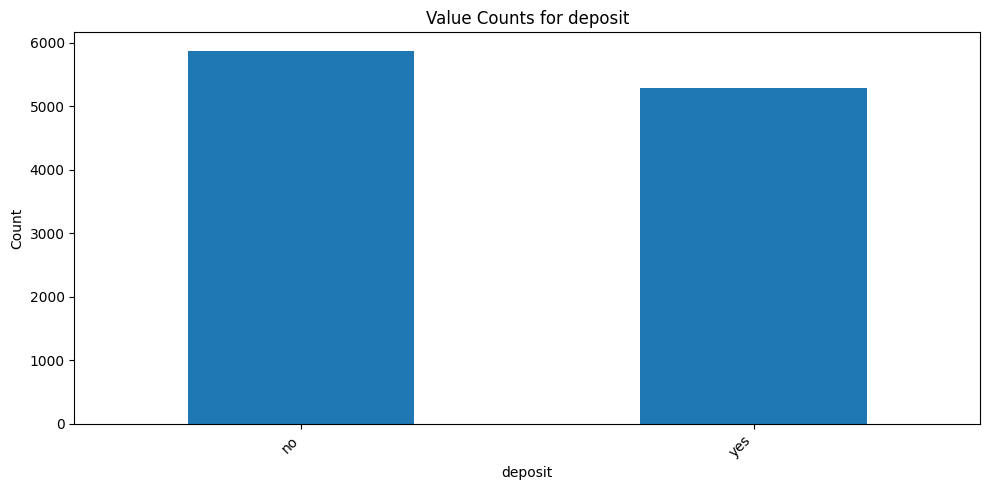

In [25]:
# Kolom 'deposit'
plt.figure(figsize=(10, 5))
data['deposit'].value_counts().plot(kind='bar')
plt.title('Value Counts for deposit')
plt.xlabel('deposit')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Grafik di atas menunjukkan jumlah nasabah yang memutuskan untuk membuka deposito dan yang tidak.

**Apa yang bisa kita lihat dari grafik ini?**

* **Jumlah nasabah yang tidak membuka deposito lebih banyak dibandingkan yang membuka deposito**. Ini artinya, sebagian besar nasabah yang dihubungi oleh bank tidak tertarik untuk membuka deposito.
* **Namun, jumlah nasabah yang membuka deposito juga cukup signifikan**. Ini menunjukkan bahwa kampanye pemasaran bank cukup berhasil dalam menarik minat sebagian nasabah untuk membuka deposito.

**Apa artinya bagi bank?**

* **Tingkat keberhasilan kampanye masih bisa ditingkatkan**. Meskipun ada nasabah yang membuka deposito, namun jumlahnya masih bisa ditingkatkan lagi.
* **Perlu dilakukan analisis lebih lanjut untuk mengetahui faktor-faktor yang mempengaruhi keputusan nasabah**. Dengan memahami faktor-faktor ini, bank dapat menyusun strategi pemasaran yang lebih efektif.
* **Perlu adanya segmentasi nasabah**. Tidak semua nasabah memiliki karakteristik yang sama. Dengan melakukan segmentasi nasabah, bank dapat memberikan penawaran yang lebih relevan dan personal kepada setiap segmen.

### **Distribusi variabel numerik**


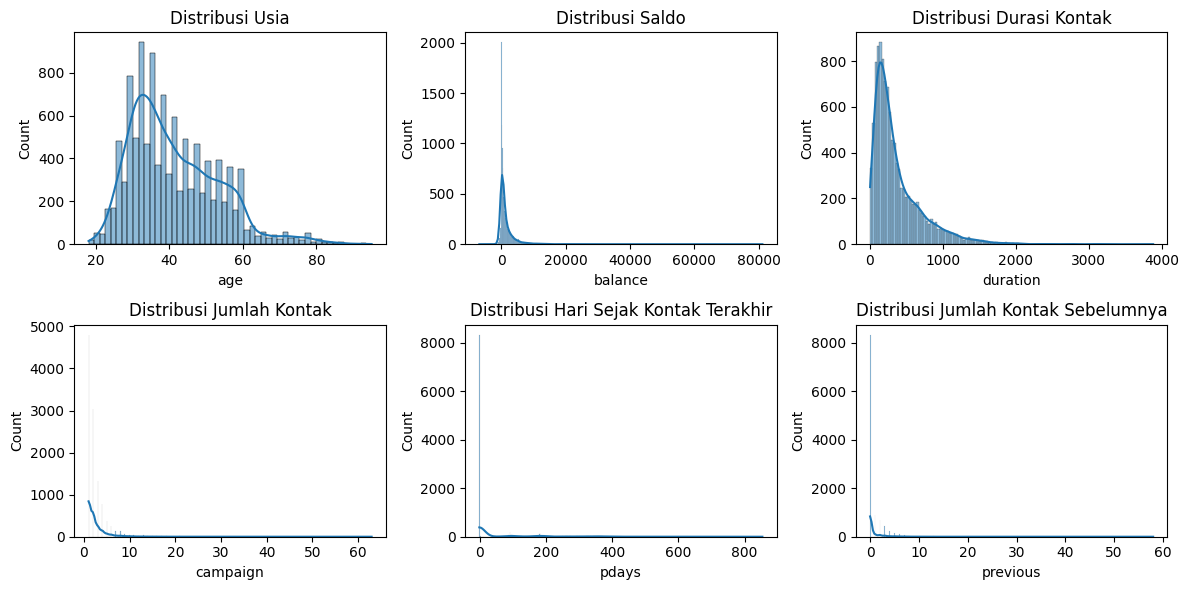

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.histplot(data['age'], kde=True)
plt.title('Distribusi Usia')
plt.subplot(2, 3, 2)
sns.histplot(data['balance'], kde=True)
plt.title('Distribusi Saldo')
plt.subplot(2, 3, 3)
sns.histplot(data['duration'], kde=True)
plt.title('Distribusi Durasi Kontak')
plt.subplot(2, 3, 4)
sns.histplot(data['campaign'], kde=True)
plt.title('Distribusi Jumlah Kontak')
plt.subplot(2, 3, 5)
sns.histplot(data['pdays'], kde=True)
plt.title('Distribusi Hari Sejak Kontak Terakhir')
plt.subplot(2, 3, 6)
sns.histplot(data['previous'], kde=True)
plt.title('Distribusi Jumlah Kontak Sebelumnya')
plt.tight_layout()
plt.show()


### **Boxplot untuk melihat outlier**


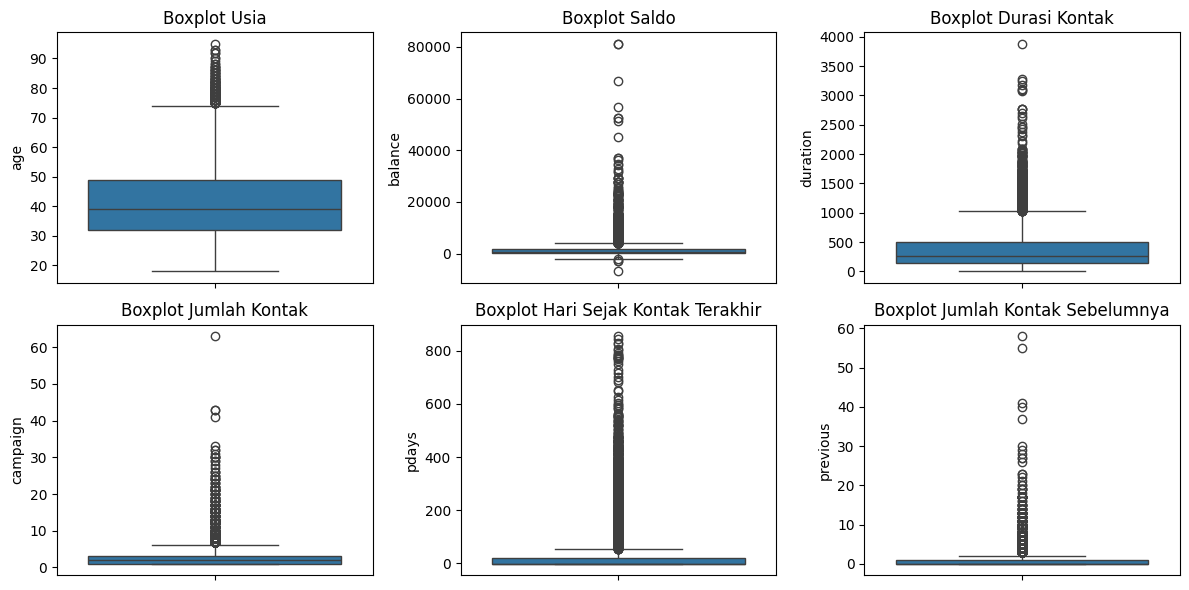

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.boxplot(y=data['age'])
plt.title('Boxplot Usia')
plt.subplot(2, 3, 2)
sns.boxplot(y=data['balance'])
plt.title('Boxplot Saldo')
plt.subplot(2, 3, 3)
sns.boxplot(y=data['duration'])
plt.title('Boxplot Durasi Kontak')
plt.subplot(2, 3, 4)
sns.boxplot(y=data['campaign'])
plt.title('Boxplot Jumlah Kontak')
plt.subplot(2, 3, 5)
sns.boxplot(y=data['pdays'])
plt.title('Boxplot Hari Sejak Kontak Terakhir')
plt.subplot(2, 3, 6)
sns.boxplot(y=data['previous'])
plt.title('Boxplot Jumlah Kontak Sebelumnya')
plt.tight_layout()
plt.show()

## **Proporsi kelas target ('deposit')**


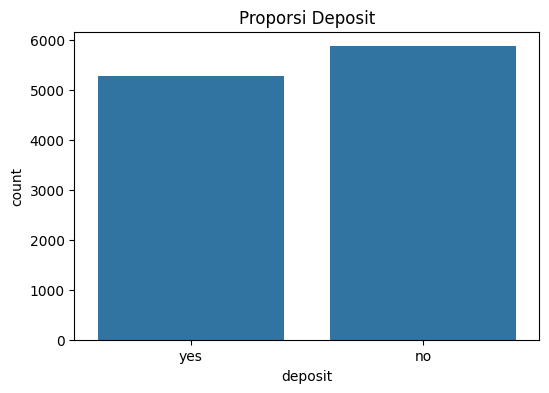

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data['deposit'])
plt.title('Proporsi Deposit')
plt.show()

### **Hubungan antara variabel kategorikal dan target**

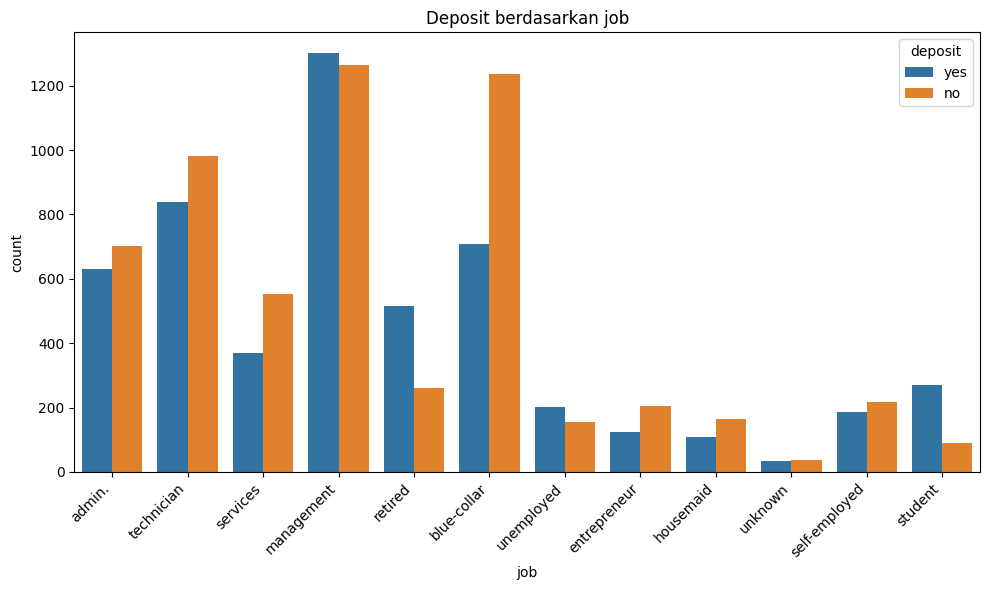

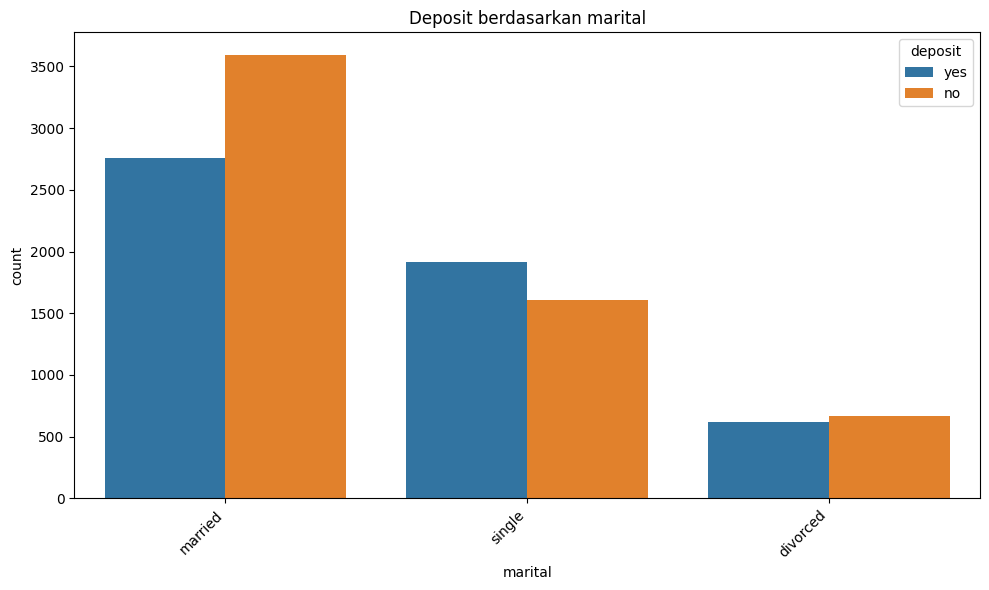

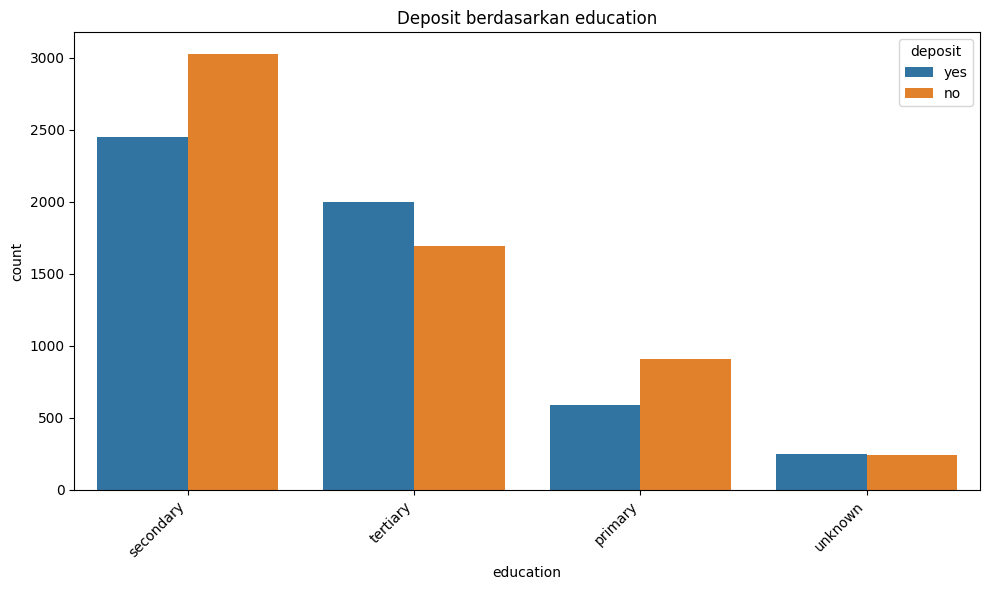

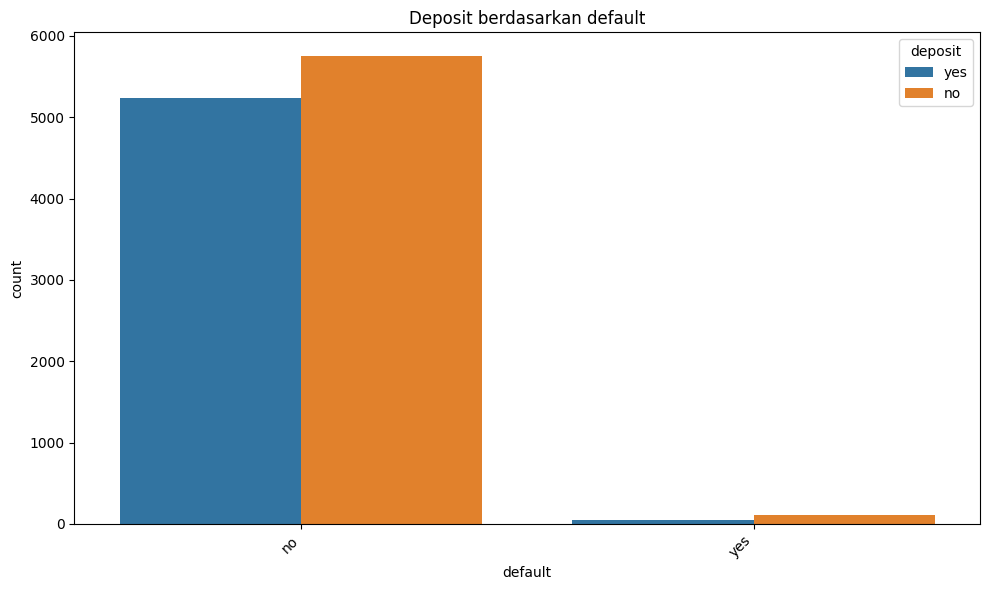

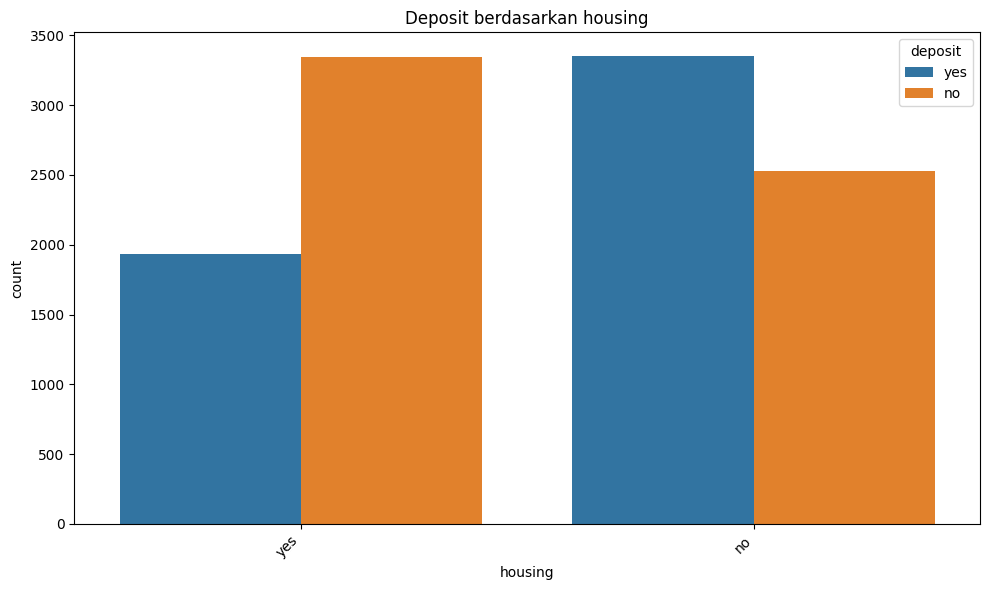

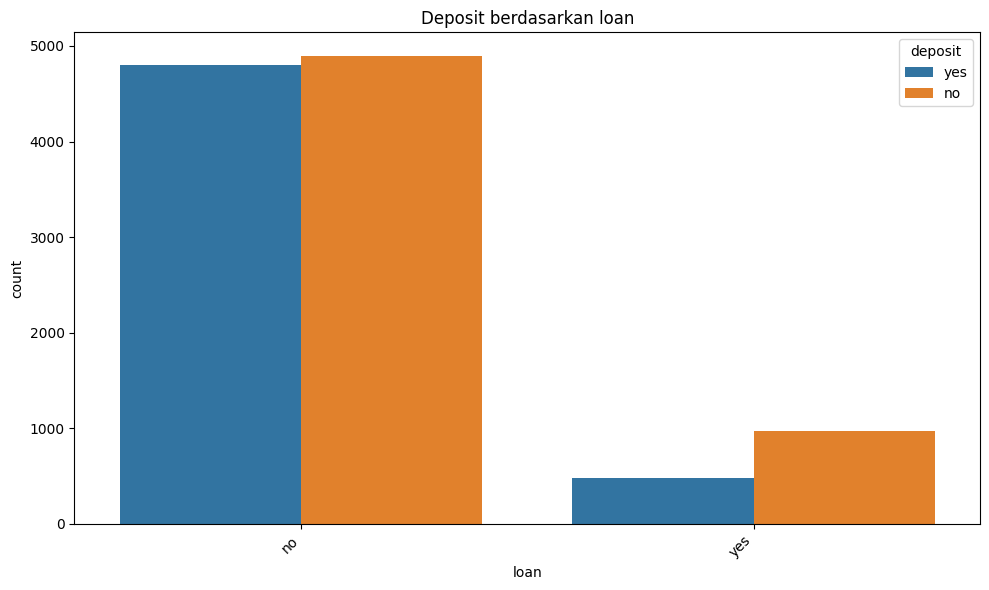

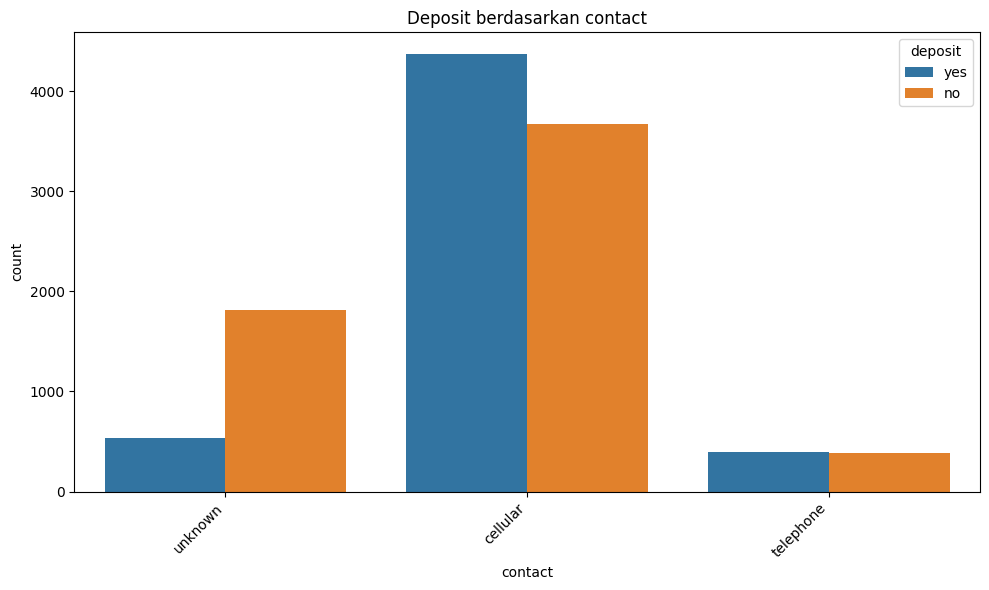

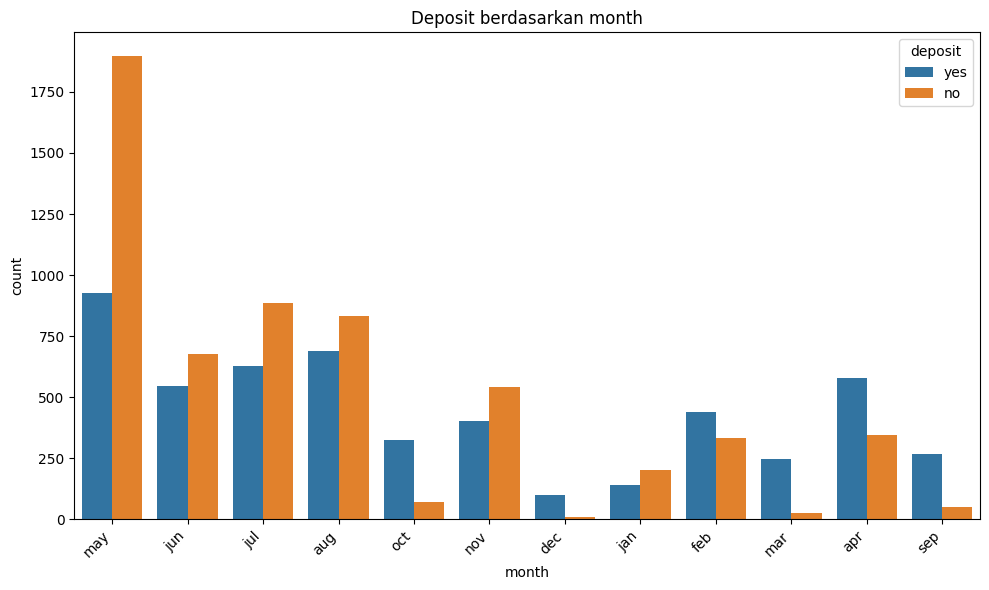

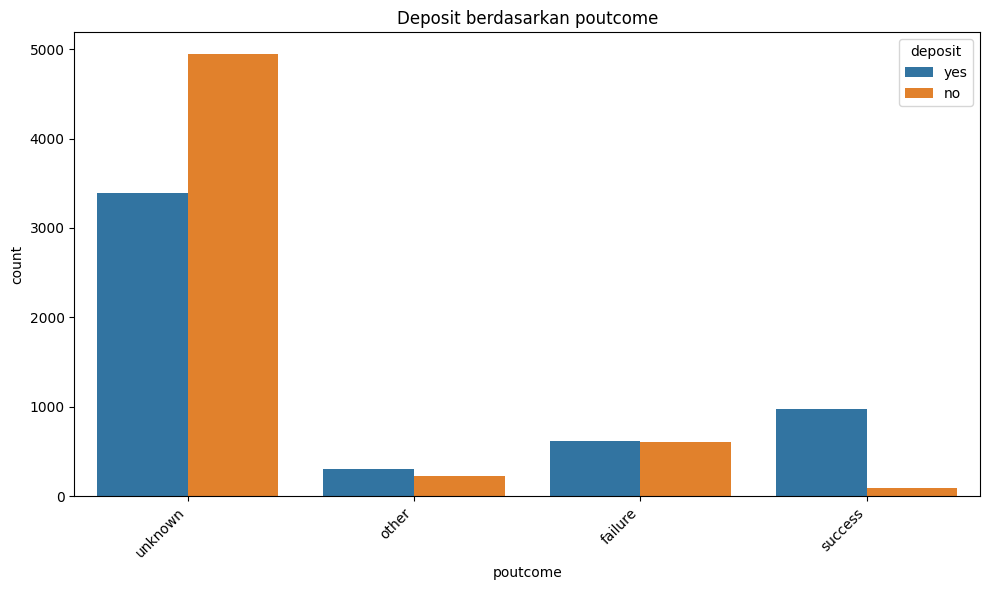

In [15]:
categorical_cols_eda = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] # Kolom kategorikal sebelum di-encode
for col in categorical_cols_eda:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[col], hue=data['deposit'])
    plt.title(f'Deposit berdasarkan {col}')
    plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar tidak tumpang tindih
    plt.tight_layout()
    plt.show()

## **3. Feature Engineering**

**a. Membuat fitur interaksi**


In [36]:
# Contoh: Kombinasi 'age' dan 'job'
data['age_job'] = data['age'].astype(str) + '_' + data['job']
encoder_age_job = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_age_job = encoder_age_job.fit_transform(data[['age_job']])
encoded_age_job_df = pd.DataFrame(encoded_age_job, columns=encoder_age_job.get_feature_names_out(['age_job']))
data = data.drop(columns=['age_job'])  # Hapus kolom asli
data = pd.concat([data, encoded_age_job_df], axis=1)

**b. Encoding Fitur Kategorikal**

Konversi variabel kategorikal menjadi numerik menggunakan One-Hot Encoding


In [37]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') #sparse=false agar output tidak sparse matrix, handle_unknown='ignore' agar data baru
encoded_data = encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
data = data.drop(categorical_cols, axis=1) # Hapus kolom kategorikal asli
data = pd.concat([data, encoded_df], axis=1) # Gabungkan data dengan hasil encoding


Mengubah variabel target 'deposit' menjadi numerik (0 dan 1)


In [38]:
data['deposit'] = data['deposit'].map({'yes': 1, 'no': 0})


Standarisasi data numerik (opsional, tapi direkomendasikan untuk beberapa model)


In [39]:
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

c. Binning untuk variabel numerik


In [40]:
# Contoh: Binning 'age' menjadi 3 kategori
bins = [0, 30, 60, 100]
labels = ['Muda', 'Dewasa', 'Lansia']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
data = pd.get_dummies(data, columns=['age_group'], prefix=['age_group']) # One-hot encoding untuk 'age_group'


**d. Membuat fitur baru**


In [41]:
# Contoh: Total jumlah interaksi (campaign + previous)
data['total_interactions'] = data['campaign'] + data['previous']